In [9]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [10]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from src.recommender.content_based import ContentBasedRecommender

In [11]:
PROCESSED_PATH = "../data/processed/spotify_clean.csv"

In [12]:
BASE_FEATURES = [
    "danceability", "energy", "loudness",
    "speechiness", "acousticness", "instrumentalness",
    "liveness", "valence", "tempo"
]

feature_sets = {
    "All features": BASE_FEATURES,
    "Without loudness": [f for f in BASE_FEATURES if f != "loudness"],
    "Without tempo": [f for f in BASE_FEATURES if f != "tempo"],
    "Without instrumentalness": [f for f in BASE_FEATURES if f != "instrumentalness"]
}

In [13]:
def evaluate_model(features, sample_size=20):
    recommender = ContentBasedRecommender(
        data_path=PROCESSED_PATH,
        features=features
    )
    recommender.load_data()
    recommender.fit()

    sample_ids = random.sample(
        list(recommender.df["spotify_id"]),
        sample_size
    )

    scores = [
        recommender.evaluate_similarity(song_id)
        for song_id in sample_ids
    ]

    return sum(scores) / len(scores)

In [14]:
results = {}

for name, features in feature_sets.items():
    score = evaluate_model(features)
    results[name] = score
    print(f"{name}: {score:.3f}")

All features: 0.962
Without loudness: 0.969
Without tempo: 0.975
Without instrumentalness: 0.962


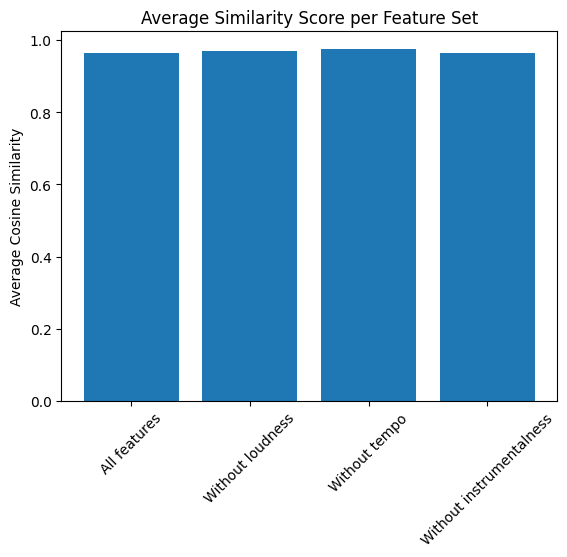

In [15]:
plt.figure()
plt.bar(results.keys(), results.values())
plt.title("Average Similarity Score per Feature Set")
plt.ylabel("Average Cosine Similarity")
plt.xticks(rotation=45)
plt.show()